# print显示全部数据

In [6]:
import pandas as pd
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50


 # 数据集导入

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
f = open('data2_2014.csv',encoding='UTF-8')
names = ['Index_Num','starttime','resolution','speed','volume','occupancy','速度','车流量','占有率','年','月','日','日期','时间','速度均值','车流量均值','占有率均值','ID','filter']  

# filename=input("文件名：")
# f=open(filename,encoding='UTF-8')
# names=['作业日期','ηCO','ηH2','TF(℃)','TC(℃)','mass','送风流量']
data=read_csv(f,names=names,header=1)
print(data)

     Index_Num          starttime resolution  speed volume occupancy  \
0          529   2/2/2014 0:05:00    0:00:05     60      1         0   
1          532   2/2/2014 0:10:00    0:00:05  63.25      8        .8   
2          533   2/2/2014 0:15:00    0:00:05     60      2         0   
3          535   2/2/2014 0:20:00    0:00:05     62      4       .13   
4          538   2/2/2014 0:25:00    0:00:05     72      1       .08   
5          539   2/2/2014 0:30:00    0:00:05   61.6      5       .33   
6          542   2/2/2014 0:35:00    0:00:05             0         0   
7          543   2/2/2014 0:40:00    0:00:05     66      6        .4   
8          546   2/2/2014 0:45:00    0:00:05     64      6       .67   
9          548   2/2/2014 0:50:00    0:00:05  64.13      8         0   
10         550   2/2/2014 0:55:00    0:00:05     58      1       .08   
11         551   2/2/2014 1:00:00    0:00:05  62.22      9        .6   
12         554   2/2/2014 1:05:00    0:00:05     57      2      

 # 单变量曲线拟合

x is :
 [  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225]
y is :
 [ 0.74230125  0.43055556  0.38294118  0.75833296  0.24722222  0.3125
  0.6

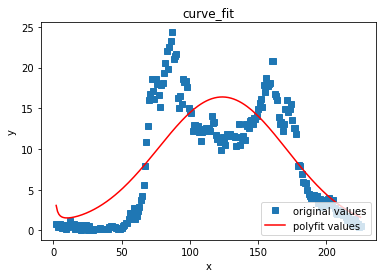

In [11]:
#拟合高斯分布
from scipy.optimize import curve_fit
import math

#自定义函数 e指数形式
def func(x, a,u, sig):
    return  a*(np.exp(-(x - u) ** 2 /(2* sig **2))/(math.sqrt(2*math.pi)*sig))*(431+(4750/x))


#定义x、y散点坐标
x = np.array(data['ID'])
x=np.array(x)
# x = np.array(range(20))
print('x is :\n',x)
num = np.array(data['占有率均值'])
y = np.array(num)
print('y is :\n',y)

popt, pcov = curve_fit(func, x, y,p0=[3.1,4.2,3.3])
#获取popt里面是拟合系数
a = popt[0]
u = popt[1]
sig = popt[2]


yvals = func(x,a,u,sig) #拟合y值
print(u'系数a:', a)
print(u'系数u:', u)
print(u'系数sig:', sig)

#绘图
plot1 = plt.plot(x, y, 's',label='original values')
plot2 = plt.plot(x, yvals, 'r',label='polyfit values')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('curve_fit')
plt.show()

## 高斯拟合
## python 拟合曲线并求参 https://www.cnblogs.com/marszhw/p/10962877.html

系数ahunt: 1971.68992260602
系数uhunt: 121.85145980428294
系数sighunt: 48.27939227708864


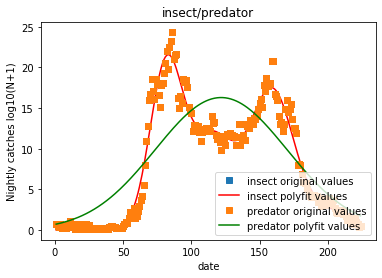

In [20]:
#单个高斯模型，如果曲线有多个波峰，可以分段拟合
def func(x, a,u, sig):
    return a*np.exp(-(x - u) ** 2 / (2 * sig ** 2)) / (sig * math.sqrt(2 * math.pi))
#混合高斯模型，多个高斯函数相加
def func3(x, a1, a2, a3, a4, a5 ,m1, m2, m3, m4, m5, s1, s2, s3, s4, s5):
    return a1 * np.exp(-((x - m1) / s1) ** 2) + a2 * np.exp(-((x - m2) / s2) ** 2) + a3 * np.exp(-((x - m3) / s3) ** 2) + a4 *np.exp(-((x - m4) / s4) ** 2) + a5 *np.exp(-((x - m5) / s5) ** 2)

#正弦函数拟合
#def fmax(x,a,b,c):
#    return a*np.sin(x*np.pi/6+b)+c
#fita,fitb=optimize.curve_fit(fmax,x,ymax,[1,1,1])
#非线性最小二乘法拟合
#def func(x, a, b,c):
#    return a*np.sqrt(x)*(b*np.square(x)+c)
# 用3次多项式拟合，可推广到n次多项式，数学上可以证明，任意函数都可以表示为多项式形式
# f1 = np.polyfit(x, y, 3)
# p1 = np.poly1d(f1)
# yvals = p1(x)  #拟合y值
#也可使用yvals=np.polyval(f1, x)

#拟合，并对参数进行限制，bounds里面代表参数上下限，p0是初始范围，默认是[1,1,1]
x=np.arange(1,data.shape[0]+1,1)
num = np.array(data['占有率均值']) #<-自己的y值
numhunt = np.array(data['占有率均值']) #<-自己的y值
y = np.array(num)
yhunt = np.array(numhunt)
# param_bounds=([-np.inf,0],[np.inf,1])#设定B和n的下界和上界。其中B为负无穷到正无穷，n为0到1
popt, pcov = curve_fit(func3, x, y,maxfev=500000)
popthunt, pcovhunt = curve_fit(func, x, yhunt,p0=[2,2,2]) 
ahunt = popthunt[0]
uhunt = popthunt[1]
sighunt = popthunt[2]
a1 = popt[0]
u1 = popt[1]
sig1 = popt[2]
a2 = popt[3]
u2 = popt[4]
sig2 = popt[5]
a3 = popt[6]
u3 = popt[7]
sig3 = popt[8]
a4 = popt[9]
u4 = popt[10]
sig4 = popt[11]
a5 = popt[12]
u5 = popt[13]
sig5 = popt[14]
yvals = func3(x,a1,u1,sig1,a2,u2,sig2,a3,u3,sig3,a4,u4,sig4,a5,u5,sig5) #拟合y值
yhuntvals = func(x,ahunt,uhunt,sighunt) #拟合y值
print(u'系数ahunt:', ahunt)
print(u'系数uhunt:', uhunt)
print(u'系数sighunt:', sighunt)
#绘图
plot1 = plt.plot(x, y, 's',label='insect original values')
plot2 = plt.plot(x, yvals, 'r',label='insect polyfit values')
plot3 = plt.plot(x, yhunt, 's',label='predator original values')
plot4 = plt.plot(x, yhuntvals, 'g',label='predator polyfit values')
plt.xlabel('date')
plt.ylabel('Nightly catches log10(N+1)')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('insect/predator')
plt.show()

## 多项式拟合

系数ahunt: 1971.68992260602
系数uhunt: 121.85145980428294
系数sighunt: 48.27939227708864


C:\ProgramData\Anaconda3\envs\mathematical_modeling\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


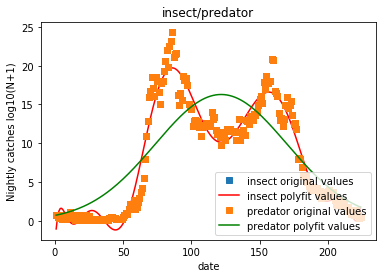

In [24]:
#单个高斯模型，如果曲线有多个波峰，可以分段拟合
def func(x, a,u, sig):
    return a*np.exp(-(x - u) ** 2 / (2 * sig ** 2)) / (sig * math.sqrt(2 * math.pi))
#混合高斯模型，多个高斯函数相加
def func3(x, a1, a2, a3, a4, a5 ,m1, m2, m3, m4, m5, s1, s2, s3, s4, s5):
    return a1 * np.exp(-((x - m1) / s1) ** 2) + a2 * np.exp(-((x - m2) / s2) ** 2) + a3 * np.exp(-((x - m3) / s3) ** 2) + a4 *np.exp(-((x - m4) / s4) ** 2) + a5 *np.exp(-((x - m5) / s5) ** 2)

#正弦函数拟合
#def fmax(x,a,b,c):
#    return a*np.sin(x*np.pi/6+b)+c
#fita,fitb=optimize.curve_fit(fmax,x,ymax,[1,1,1])
#非线性最小二乘法拟合
#def func(x, a, b,c):
#    return a*np.sqrt(x)*(b*np.square(x)+c)
# 用3次多项式拟合，可推广到n次多项式，数学上可以证明，任意函数都可以表示为多项式形式
# f1 = np.polyfit(x, y, 3)
# p1 = np.poly1d(f1)
# yvals = p1(x)  #拟合y值
#也可使用yvals=np.polyval(f1, x)

#拟合，并对参数进行限制，bounds里面代表参数上下限，p0是初始范围，默认是[1,1,1]
x=np.arange(1,data.shape[0]+1,1)
num = np.array(data['占有率均值']) #<-自己的y值
numhunt = np.array(data['占有率均值']) #<-自己的y值
y = np.array(num)
f1 = np.polyfit(x, y, 13)
p1 = np.poly1d(f1)
yvals = p1(x)

yhunt = np.array(numhunt)
# param_bounds=([-np.inf,0],[np.inf,1])#设定B和n的下界和上界。其中B为负无穷到正无穷，n为0到1
popt, pcov = curve_fit(func3, x, y,maxfev=500000)
popthunt, pcovhunt = curve_fit(func, x, yhunt,p0=[2,2,2]) 
ahunt = popthunt[0]
uhunt = popthunt[1]
sighunt = popthunt[2]
yhuntvals = func(x,ahunt,uhunt,sighunt) #拟合y值
print(u'系数ahunt:', ahunt)
print(u'系数uhunt:', uhunt)
print(u'系数sighunt:', sighunt)
#绘图
plot1 = plt.plot(x, y, 's',label='insect original values')
plot2 = plt.plot(x, yvals, 'r',label='insect polyfit values')
plot3 = plt.plot(x, yhunt, 's',label='predator original values')
plot4 = plt.plot(x, yhuntvals, 'g',label='predator polyfit values')
plt.xlabel('date')
plt.ylabel('Nightly catches log10(N+1)')
plt.legend(loc=4) #指定legend的位置右下角
plt.title('insect/predator')
plt.show()

# 多元多项式拟合
# https://blog.csdn.net/qq_33511693/article/details/105169807

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

x = np.array(data[['速度均值','车流量均值']])

y = np.array(data['占有率均值'])


def stdError_func(y_test, y):
  return np.sqrt(np.mean((y_test - y) ** 2))


def R2_1_func(y_test, y):
  return 1 - ((y_test - y) ** 2).sum() / ((y.mean() - y) ** 2).sum()


def R2_2_func(y_test, y):
  y_mean = np.array(y)
  y_mean[:] = y.mean()
  return 1 - stdError_func(y_test, y) / stdError_func(y_mean, y)


poly_reg =PolynomialFeatures(degree=2) #三次多项式
X_ploy =poly_reg.fit_transform(x)
lin_reg_2=linear_model.LinearRegression()
lin_reg_2.fit(X_ploy,y)
predict_y =  lin_reg_2.predict(X_ploy)
strError = stdError_func(predict_y, y)
R2_1 = R2_1_func(predict_y, y)
R2_2 = R2_2_func(predict_y, y)
score = lin_reg_2.score(X_ploy, y) ##sklearn中自带的模型评估，与R2_1逻辑相同

print("coefficients", lin_reg_2.coef_)
print("intercept", lin_reg_2.intercept_)
print('degree={}: strError={:.2f}, R2_1={:.2f},  R2_2={:.2f}, clf.score={:.2f}'.format(
    3, strError,R2_1,R2_2,score))
#clf.score它提供了一个缺省的评估法则来解决问题，简要的说，它用你训练好的模型在测试集上进行评分（0~1）1分代表最好

coefficients [ 0.         -0.46499633  0.37851065  0.00195408 -0.00344414 -0.00056661]
intercept 20.332811734000295
degree=3: strError=0.82, R2_1=0.99,  R2_2=0.88, clf.score=0.99


[-0.15667637  0.9008221   0.7770176   0.28648096 -0.48834863  0.79526573
 -0.18166071 -0.18999194  0.58497816  0.9953296   1.1650165   1.6107224
  1.9833082   0.99657124 -0.23334976  0.43487418  0.23160271  0.5763638
 -0.18306753 -0.06928682 -0.30678597 -0.12466099 -0.23418792  0.47485167
 -0.03100481  1.0753838   0.7505932   0.9522636  -0.10516552 -0.45635742
 -0.41645053 -0.14609985  1.1019144   0.44078597 -0.11460689 -0.07742251
  0.3833815  -0.3329319  -0.15620777 -0.13696142 -0.5092669   0.20776442
 -0.04645876 -0.13004443 -0.30788964 -0.543433    0.08403637 -0.3163265
  0.1568681   0.04821375  0.52854055  0.60786664  0.3054785   1.5172805
  2.2112808   2.5671334   1.842732    1.4515622   1.762512    2.2582178
  2.4827874   3.8680167   3.785382    5.2461896   5.398182    7.622414
 10.47297    13.075421   14.874637   18.169445   18.223835   18.922356
 17.280537   20.33178    16.859426   18.785393   17.031378   18.705526
 18.379581   18.816507   18.650862   22.433039   18.248726   2

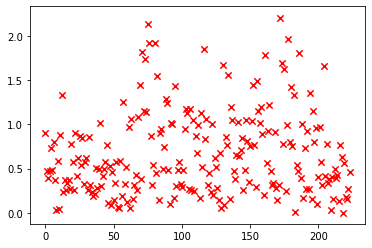

2.2121593631730434


In [67]:
#算一下得到的方程表达式跟实际的差值
intercept = lin_reg_2.intercept_
coefficients =lin_reg_2.coef_
yres =[]
for i in range(data.shape[0]):
    variable_x = [1,data.loc[i,["速度均值"]].values,data.loc[i,["车流量均值"]].values,(data.loc[i,["速度均值"]].values)**2,(data.loc[i,["速度均值"]].values*data.loc[i,["车流量均值"]].values),(data.loc[i,["车流量均值"]].values)**2]
    tmp_varX = np.array(variable_x,dtype=np.float32).T
#     print(tmp_varX, tmp_varX.dtype,tmp_varX.shape)
    yres.append((intercept + np.dot(coefficients , tmp_varX)).astype(float))
    
#做一下和源数据之间的差值
yres = np.array(yres,dtype=np.float32)
print(yres, yres.dtype,yres.shape)
dval= np.abs(yres - data['占有率均值'].values) 
print("*******************************************")
print(dval)
#画出散点图
x = range(0,dval.shape[0],1)
print(len(x),len(dval))
plt.scatter(x, dval, marker = 'x',color = 'red', s = 40 ,label = 'First')
plt.show()
print(max(dval))

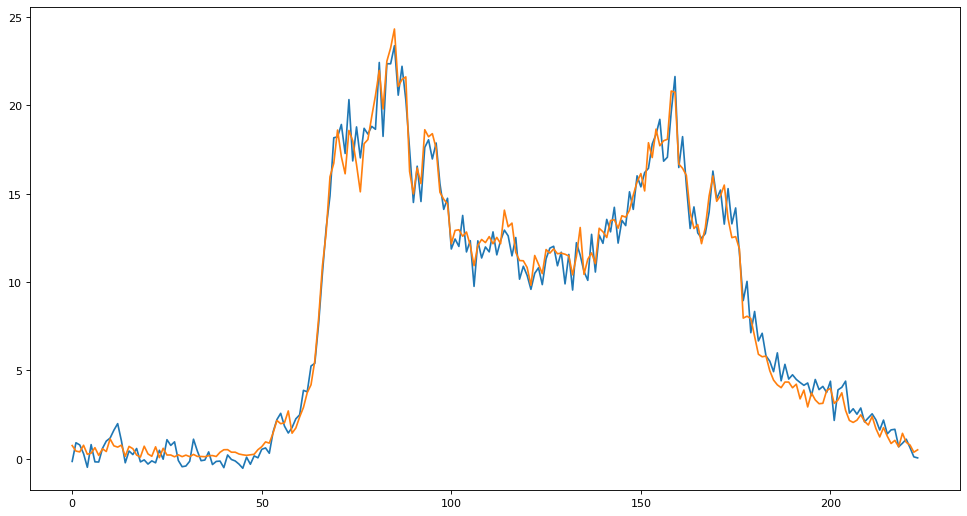

In [70]:
#yres
#data['占有率均值']
#x = range(0,dval.shape[0],1)
import matplotlib.pyplot as plt
import numpy as np
#开启一个窗口，num设置子图数量，figsize设置窗口大小，dpi设置分辨率
fig = plt.figure(num=1, figsize=(15, 8),dpi=80) 
#直接用plt.plot画图，第一个参数是表示横轴的序列，第二个参数是表示纵轴的序列   
plt.plot(x,yres)
plt.plot(x,data['占有率均值'])
#显示绘图结果
plt.show()


## 三参数各自表达式画图及预测和误差分析

### 速度-时间

[58.762489602821155, 58.91483220449942, 59.05662629750246, 59.18780034665247, 59.30829084827781, 59.418043139051164, 59.517012413209656, 59.60516499886828, 59.68247995258625, 59.748951039997394, 59.80458917871323, 59.849425427217284, 59.88351460927257, 59.906939666434205, 59.91981683036555, 59.922301700378945, 59.91459629838883, 59.89695715161174, 59.869704421218565, 59.83323205120822, 59.78801885478958, 59.73464038476543, 59.67378134973245, 59.606248240181486, 59.53298171976973, 59.45506822043892, 59.37375006044396, 59.29043328805871, 59.20669234858389, 59.124270587504085, 59.04507554848409, 58.9711680122041, 58.90474376159101, 58.84810716075201, 58.803635807042774, 58.773735763649796, 58.760787205555495, 58.767080711853716, 58.79474490377295, 58.845666646244645, 58.92140558122255, 59.02310531731868, 59.1514041318804, 59.306348514017955, 59.48731325414766, 59.69293203163684, 59.921042534395575, 60.168650035696224, 60.43191303534821, 60.7061540365066, 60.98589778027269, 61.264938315965

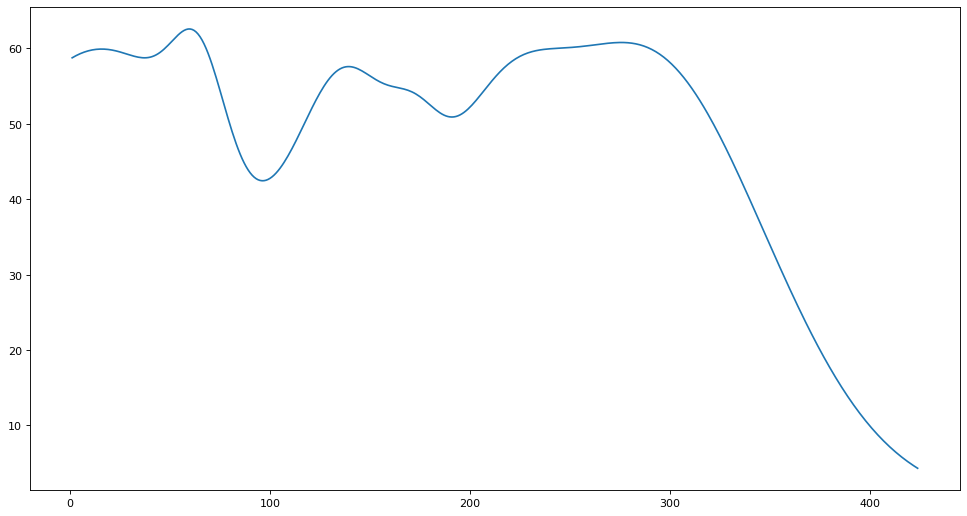

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import math
# x = range(1,dval.shape[0]+1,1)
# x= np.array(x)
Xlabel = range(1,dval.shape[0]+1+200,1)
Xlabel = np.array(Xlabel)
a1 = 13.33
b1 = 64.76
c1 = 18.38
a2 = 59.19
b2 = 286.9
c2 = 84.72 
a3 = 37.64 
b3 = 139 
c3 = 35.25
a4 = 59.91 
b4 = 15.44
c4 = 103.8
a5 = 26.85
b5 = 208
c5 = 44.01 
a6 = 9.154 
b6 = 173.1
c6 = 18.65
f1=[]
for x in range(1,dval.shape[0]+1+200,1):
    f1.append(a1*math.exp(-((x-b1)/c1)**2) + a2*math.exp(-((x-b2)/c2)**2) + a3*math.exp(-((x-b3)/c3)**2) + a4*math.exp(-((x-b4)/c4)**2) + a5*math.exp(-((x-b5)/c5)**2) + a6*math.exp(-((x-b6)/c6)**2))

print(f1)
    
    
#开启一个窗口，num设置子图数量，figsize设置窗口大小，dpi设置分辨率
fig = plt.figure(num=1, figsize=(15, 8),dpi=80) 
#直接用plt.plot画图，第一个参数是表示横轴的序列，第二个参数是表示纵轴的序列   
plt.plot(Xlabel,f1)
# plt.plot(Xlabel,data["速度均值"].values)
#显示绘图结果
plt.show()

In [ ]:
#画出散点图
plt.scatter(x, dval, marker = 'x',color = 'red', s = 40 ,label = 'First')
plt.show()
print(max(dval))

### 流量-时间

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
# x = range(1,dval.shape[0]+1,1)
# x= np.array(x)
Xlabel = range(1,dval.shape[0]+1+200,1)
Xlabel = np.array(Xlabel)
a1 = 138.4 
b1 = 204.8  
c1 = 147 
a2 = -78.35 
b2 = 263.1 
c2 = 93.52 
a3 = 42.64 
b3 = 73.79 
c3 = 26.29  
a4 = -38.87  
b4 = 53.01  
c4 = 18.93 
a5 = 24.06  
b5 = 210.1 
c5 = 18  
a6 = -8.894  
b6 = 146.8 
c6 = 12.49  
f1=[]
for x in range(1,dval.shape[0]+1+200,1):
    f1.append(a1*math.exp(-((x-b1)/c1)**2) + a2*math.exp(-((x-b2)/c2)**2) + a3*math.exp(-((x-b3)/c3)**2) + a4*math.exp(-((x-b4)/c4)**2) + a5*math.exp(-((x-b5)/c5)**2) + a6*math.exp(-((x-b6)/c6)**2))

print(f1)
    
    
#开启一个窗口，num设置子图数量，figsize设置窗口大小，dpi设置分辨率
fig = plt.figure(num=1, figsize=(15, 8),dpi=80) 
#直接用plt.plot画图，第一个参数是表示横轴的序列，第二个参数是表示纵轴的序列   
plt.plot(Xlabel,f1)
# plt.plot(Xlabel,data["速度均值"].values)
#显示绘图结果
plt.show()

In [ ]:
#画出散点图
plt.scatter(x, dval, marker = 'x',color = 'red', s = 40 ,label = 'First')
plt.show()
print(max(dval))

### 占有率-时间

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
# x = range(1,dval.shape[0]+1,1)
# x= np.array(x)
Xlabel = range(1,dval.shape[0]+1+200,1)
Xlabel = np.array(Xlabel)
a1 = 3.161  
b1 = 14.87 
c1 = 58.21  
a2 = 14.47  
b2 = 180.9  
c2 = 71.59 
a3 = 16.44  
b3 = 91.68 
c3 = 22.9 
a4 = 5.304  
b4 = 117.4  
c4 = 12.35  
a5 = 0.971  
b5 = 142.2 
c5 = 5.098 
f1=[]
for x in range(1,dval.shape[0]+1+200,1):
    f1.append(a1*math.exp(-((x-b1)/c1)**2) + a2*math.exp(-((x-b2)/c2)**2) + a3*math.exp(-((x-b3)/c3)**2) + a4*math.exp(-((x-b4)/c4)**2) + a5*math.exp(-((x-b5)/c5)**2) + a6*math.exp(-((x-b6)/c6)**2))

print(f1)
    
    
#开启一个窗口，num设置子图数量，figsize设置窗口大小，dpi设置分辨率
fig = plt.figure(num=1, figsize=(15, 8),dpi=80) 
#直接用plt.plot画图，第一个参数是表示横轴的序列，第二个参数是表示纵轴的序列   
plt.plot(Xlabel,f1)
# plt.plot(Xlabel,data["速度均值"].values)
#显示绘图结果
plt.show()

In [ ]:
#画出散点图
plt.scatter(x, dval, marker = 'x',color = 'red', s = 40 ,label = 'First')
plt.show()
print(max(dval))